In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os
sys.path.insert(1, 'C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\Gas_Handler22')
sys.path.insert(2, 'C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\VNA_GUI')
import handler as h
import HP8753E as hp

In [2]:
frigo = h.FridgeHandler()
vna = hp.HP8753E()

Creating the object
Cryo handler object created correctly!

Creating the object
VNA object created correctly!

Default number of points for a sweep: 1601


In [28]:
Temp = 140

In [29]:
frigo.set_mixc_temp(Temp)

In [30]:
output = frigo.get_sensor(3)

In [32]:
frigo.scan_T(cmd='R3', interval=5, tottime=60)

IndexError: list index out of range

In [23]:
vna.autoscale()
vna.set_params(pw = -40, bw = 800, pt = 1601, center = 5.3425e9, span = 2e7)
vna.set_save_path("C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\Test_data\\Sweep\\")

In [24]:
output = str(int(output))

In [25]:
parent_dir = "C:\\Users\\kid\\SynologyDrive\\Lab2023\\KIDs\\QTLab2324\\IRdetection\\Instruments\\Test_data\\Sweep\\"
pows = np.arange(-40,-12,1)
data = []
directory = 'T_'+str(output)
path = os.path.join(parent_dir, directory) 
os.mkdir(path) 
vna.set_save_path(parent_dir+directory+'\\')
vna.set_T(output)

num = 10

S21 = []
for (j,pow) in enumerate(pows):
    vna.set_power(pow)
    vna.autoscale()
    data = np.zeros(1601)
    for k in range(num):
        print('T = '+str(output)+'...Remaining: '+str(len(pows)-j)+' , '+str(num-k))
        s21, f = vna.get_S21F()
        data = data + s21
    S21.append(data/num)

T = 276...Remaining: 28 , 10
T = 276...Remaining: 28 , 9
T = 276...Remaining: 28 , 8
T = 276...Remaining: 28 , 7
T = 276...Remaining: 28 , 6
T = 276...Remaining: 28 , 5
T = 276...Remaining: 28 , 4
T = 276...Remaining: 28 , 3
T = 276...Remaining: 28 , 2
T = 276...Remaining: 28 , 1
T = 276...Remaining: 27 , 10
T = 276...Remaining: 27 , 9
T = 276...Remaining: 27 , 8
T = 276...Remaining: 27 , 7
T = 276...Remaining: 27 , 6
T = 276...Remaining: 27 , 5
T = 276...Remaining: 27 , 4
T = 276...Remaining: 27 , 3
T = 276...Remaining: 27 , 2
T = 276...Remaining: 27 , 1
T = 276...Remaining: 26 , 10
T = 276...Remaining: 26 , 9
T = 276...Remaining: 26 , 8
T = 276...Remaining: 26 , 7
T = 276...Remaining: 26 , 6
T = 276...Remaining: 26 , 5
T = 276...Remaining: 26 , 4
T = 276...Remaining: 26 , 3
T = 276...Remaining: 26 , 2
T = 276...Remaining: 26 , 1
T = 276...Remaining: 25 , 10
T = 276...Remaining: 25 , 9
T = 276...Remaining: 25 , 8
T = 276...Remaining: 25 , 7
T = 276...Remaining: 25 , 6
T = 276...Remain

In [26]:
for (j,s21) in enumerate(S21):
    vna.create_run_s21(j+1, s21, f)

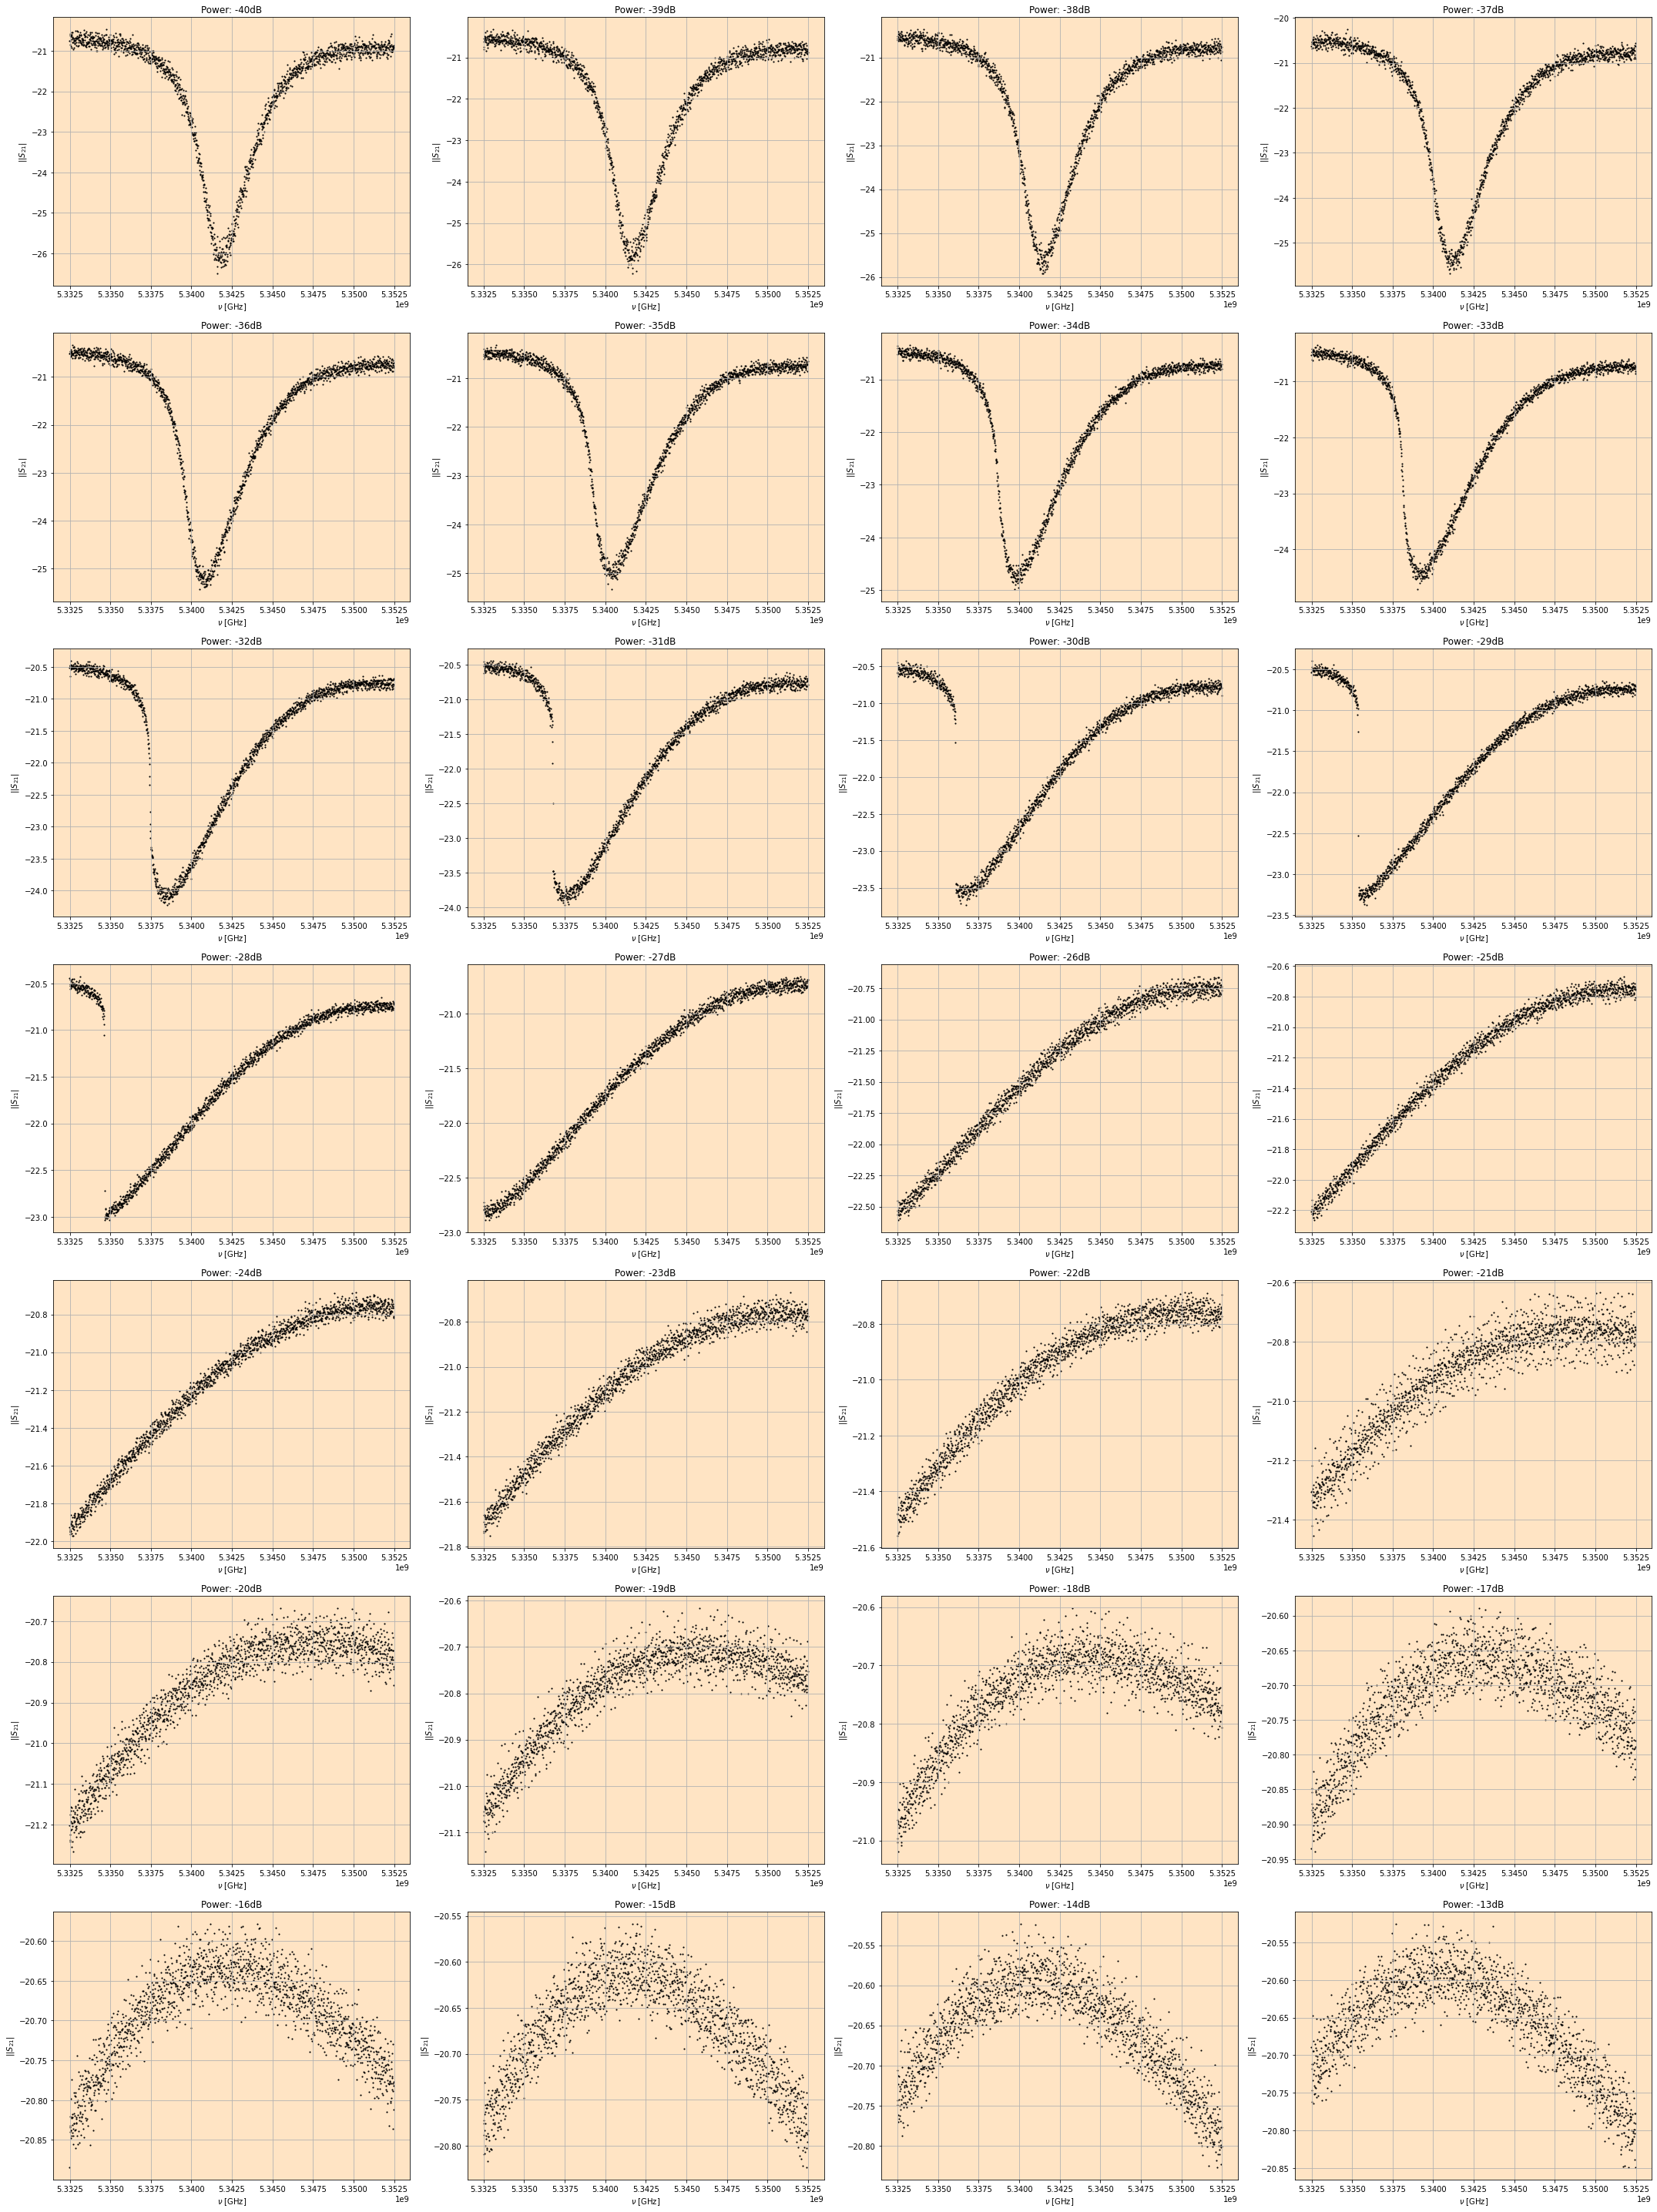

In [27]:
rows = 7
columns = int(len(pows)/rows)

fig, ax = plt.subplots(rows, columns, figsize=(30,40))

for row in range(rows):
    for col in range(columns):
        ax[row][col].scatter(f, S21[row*columns+col], marker='.', s=5, color='black')
        ax[row][col].set_title('Power: '+str(pows[row*columns+col])+'dB')
        ax[row][col].grid()
        ax[row][col].set_facecolor('bisque')
        ax[row][col].set_xlabel(r'$\nu$ [GHz]')
        ax[row][col].set_ylabel(r'$||S_{21}|$')
fig.tight_layout()

In [16]:
fig.savefig('T_'+str(Temp)+'.png')